<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics 

Considering the amount of data produced nowadays in many fields, the computer manipulation of this information is not only important but also has become a very active field of study. Despite of the fact of increasing computational facilities, the effort necessary to make statistical analysis has become more complicated, at least in the computational aspect. This is why 
becomes fundamental to some aspects, leastwise in a raw way.  

- - -
- [Data Adjust](#Data-Adjust) 
    - [Linear least square](##Linear-least-squares)
    - [Example 1](#Example-1)
    - [Non-linear least square](##Non-linear-least-square)
- [Random Numbers](#Random-Numbers)  
    - [Example 2](#Example-2)
- - -

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from matplotlib import animation

## Data Adjust
See also: 
* https://www.mathsisfun.com/data/least-squares-regression.html
* http://blog.mmast.net/least-squares-fitting-numpy-scipy
* https://stackoverflow.com/a/43623588/2268280

Given a data set, the first approach to find a function that passes through the points would be using a
interpolation polynomial. But we should take special attention to the way data set is gathered, i.e., usually
is a sample obtained experimentally or in a way that has associated an intrinsic error. 
Then, forcing that the approximate function passes through all the points would actually incur in incrementing the error. This is why it is necessary to build a different procedure to build the function that fits the data.

The fitting functions, though, are build using a Lagrange polynomial and the order of this polynomial constitutes
the approximation that is going to be used. But the fitting function is not going to take the exact value in
the known points, they are going to desagree in certain tolerance value. 


<!-- This type of procedure is also used to approximate functions to a simper type of function. Although the procedure
is very similar is not going to be discussed here because of the lack of use of this kind of procedures.  -->


## Linear least squares

Approximating a data set to a linear Langrange polynomial would be just to use
$$
y_i= f(x_i) = a_1x_i + a_0\,.
$$
However, with experimental data, the problem is that the values $y_i$ are not precise, then it is proposed to find the best approximation.
For the best _linear approximation_, we need to find  for _all_ points the value of $a_0$ and $a_1$ that _minimize_ the error
$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$
where the square is more well suited for the minimization procedure since avoids the fluctions for changes of sign.

To minimize the function of 2 variables, $E(a_0,a_1)$ with respect to $a_0$ and $a_1$,  it is necessary to set its partial derivatives to zero and simultaneously 
solve to the resulting equations. 


To establish the minimzation equations, it is necesary to take the partial derivatives with respect to $a_0$  and $a_1$ and and equal them to zero
$$
\frac{\partial E}{\partial a_0} = 0\,, \hspace{1cm} 
\frac{\partial E}{\partial a_1} = 0\,.
$$

Afterwards, 

\begin{align}
&0= 2\sum_{i=1}^{m}(y_i -a_1x_i-a_0)(-1)\,, && 
&0 =& 2\sum_{i=1}^{m}(y_i -a_1x_i-a_0)(-x_i) \\
&a_0 m + a_1\sum_{i=1}^{m}x_i = \sum_{i=1}^{m} y_i\,,&& &a_0\sum_{i=1}^{m}x_i  + a_1\sum_{i=1}^{m}x_i^2 = \sum_{i=1}^{m} x_iy_i 
\end{align}

\begin{align}
a_0= &\frac{ \sum_{i=1}^{m} y_i-a_1\sum_{i=1}^{m}x_i }{m} 
\end{align}





Replacing back in the second equation
\begin{align}
 \left( \frac{ \sum_{i=1}^{m} y_i-a_1\sum_{i=1}^{m}x_i }{m} \right)\sum_{i=1}^{m}x_i  + a_1\sum_{i=1}^{m}x_i^2 = \sum_{i=1}^{m} x_iy_i 
\end{align}
\begin{align}
   \frac{1}{m}\sum_{i=1}^{m} y_i \sum_{i=1}^{m}x_i -a_1\frac{1}{m} \sum_{i=1}^{m}x_i \sum_{i=1}^{m}x_i   + a_1\sum_{i=1}^{m}x_i^2 = \sum_{i=1}^{m} x_iy_i 
\end{align}
\begin{align}
   a_1\left[ \sum_{i=1}^{m}x_i^2 -\frac{1}{m}\left(   \sum_{i=1}^{m}x_i \right)^2  \right]   = \sum_{i=1}^{m} x_iy_i - \frac{1}{m}\sum_{i=1}^{m} y_i \sum_{i=1}^{m}x_i
\end{align}
\begin{align}
   a_1\left[ m\sum_{i=1}^{m}x_i^2 -\left(   \sum_{i=1}^{m}x_i \right)^2  \right]   = m\sum_{i=1}^{m} x_iy_i -\sum_{i=1}^{m} y_i \sum_{i=1}^{m}x_i
\end{align}



Therefore
\begin{align}
a_1 = \frac{m\sum_{i=1}^{m} x_iy_i - \sum_{i=1}^{m} x_i \sum_{i=1}^{m} y_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2} 
\end{align}


Replacing back in $a_0$
\begin{align}
ma_0= &\sum_{i=1}^{m} y_i-a_1\sum_{i=1}^{m}x_i \\
 = &\sum_{i=1}^{m} y_i-\left[\frac{m\sum_{i=1}^{m} x_iy_i - \sum_{i=1}^{m} x_i \sum_{i=1}^{m} y_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2}  \right]\sum_{i=1}^{m}x_i \\
= &\sum_{i=1}^{m} y_i-\frac{m\sum_{i=1}^{m}x_i\sum_{i=1}^{m} x_iy_i - \left( \sum_{i=1}^{m} x_i\right)^2 \sum_{i=1}^{m} y_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2}   \\
= &\frac{m\sum_{i=1}^{m} x_i^2\sum_{i=1}^{m} y_i-m\sum_{i=1}^{m}x_i\sum_{i=1}^{m} x_iy_i  }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2}   \\
\end{align}

\begin{align}
a_0= &\frac{\sum_{i=1}^{m} x_i^2\sum_{i=1}^{m} y_i-\sum_{i=1}^{m}x_i\sum_{i=1}^{m} x_iy_i  }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2}   \\
\end{align}

where the coefficients $a_0$ and $a_1$ can be easily obtained

$$
a_0 = \frac{\sum_{i=1}^{m} x_i^2\sum_{i=1}^{m}y_i - \sum_{i=1}^{m} x_iy_i \sum_{i=1}^{m} x_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2}\,, \hspace{1.5cm}
a_1 = \frac{m\sum_{i=1}^{m} x_iy_i - \sum_{i=1}^{m} x_i \sum_{i=1}^{m} y_i }
{m\sum_{i=1}^{m} x_i^2 - \left(\sum_{i=1}^{m} x_i\right)^2} 
$$

Now, using the error definition one can find the error associated to the approximation made,

since the coefficients $a_0$ and $a_1$ are already known. 

From [Least sqaure method in python](https://stackoverflow.com/a/43623588/2268280):

> There are many [curve fitting](https://python4mpia.github.io/fitting_data/fitting_data.html) functions in scipy and numpy and each is used differently, e.g. [scipy.optimize.leastsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html) and [scipy.optimize.least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html). For simplicity, we will use [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), but it is difficult to find an optimized regression curve without selecting reasonable starting parameters. A simple technique will later be demonstrated on selecting starting parameters.

In our first example the starting parameters will be just zeros

## Example 1

A body is moving under the influence of an external force, the variation of the position measured for different 
times are compiled in table 1 

| t(s) | x(m) | v(m/s)         
| :------: |:-------------: | :-------:|
|0| 2.76 | 33.10
| 1.11| 29.66 | 21.33
| 2.22|46.83 | 16.57
|3.33 | 44.08 |-5.04
| 4.44| 37.26| -11.74
| 5.55| 12.03| -27.32| 


In [3]:
import pandas as pd

In [4]:
#'x': [2.76,  29.66,46.83,44.08,37.26,12.03],
df=pd.DataFrame( {'t': [ 0.,  1.11,  2.22,  3.33,  4.44, 5.55],#'x': [2.76,  29.66,46.83,44.08,37.26,12.03],
                  'v': [33.10, 21.33, 16.57, -5.04, -11.74, -27.32]} )
df[['t','v']]

,t,v
0,0.00,33.10
1,1.11,21.33
2,2.22,16.57
3,3.33,-5.04
4,4.44,-11.74
5,5.55,-27.32


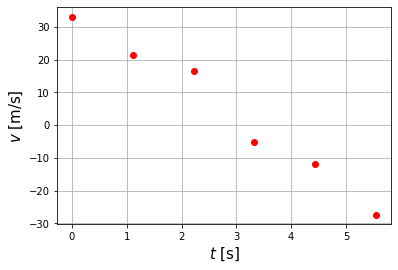

In [5]:
plt.plot(df.t,df.v,'ro')
plt.xlabel('$t$ [s]',size=15 )
plt.ylabel('$v$ [m/s]',size=15 )
plt.grid()

In [7]:
import scipy.optimize as optimize

In [8]:
def func(t,a1,a0):
    return a1*t+a0

The starting point is optional

In [9]:
starting_parameters=[0,0]

In [10]:
a,Δa=optimize.curve_fit(func,df.t,df.v,p0=starting_parameters)

In [11]:
a

array([-10.88597169,  34.69190478])

The correlation matrix,$\Delta a$ , give as the error in the determination of the parameters

In [12]:
Δa

array([[ 0.68398817, -1.89806718],
       [-1.89806718,  7.72513347]])

In [13]:
np.diag(Δa)

array([0.68398817, 7.72513347])

In [15]:
print(a)
print('-'*20)
print(Δa)
σ = np.sqrt(np.diag(Δa))
print('-'*20)
print('a1={:.2f}±{:.2f}, a0={:.1f}±{:.1f}'.format(a[0],σ[0],a[1],σ[1]) )

[-10.88597169  34.69190478]
--------------------
[[ 0.68398817 -1.89806718]
 [-1.89806718  7.72513347]]
--------------------
a1=-10.89±0.83, a0=34.7±2.8


In [16]:
t_lin=np.linspace(0,5.55)
v_model=func(t_lin,*a) #func(t_lin,a[0],a[1])
df['v_fitted']=func(df.t,*a)

In [17]:
df

,t,v,v_fitted
0,0.00,33.10,34.691905
1,1.11,21.33,22.608476
2,2.22,16.57,10.525048
3,3.33,-5.04,-1.558381
4,4.44,-11.74,-13.641810
5,5.55,-27.32,-25.725238


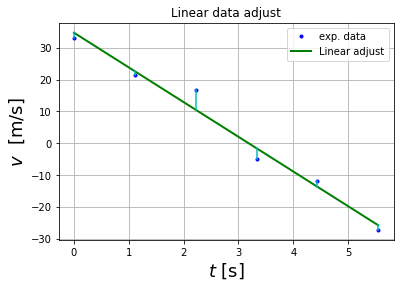

In [18]:
plt.plot(df.t,df.v,'b.',label='exp. data')
plt.plot(df.t,a[0]*df.t+a[1],'g-',lw=2,label="Linear adjust")
for i in range(df.t.size):
    plt.plot(np.array([df.t[i],df.t[i]]), np.array([df.v[i],df.v_fitted[i] ]),"c-")
    
plt.xlabel( "$t$ [s]", fontsize = 18 )
plt.ylabel( "$v$  [m/s]", fontsize = 18 )
plt.title("Linear data adjust")
plt.legend()
plt.grid()    

__Activity__: plot the error bands. Use https://beta.deepnote.com/project/4b6ea05f-f155-4eae-959c-cd064deaa7b6

__Activity__: Solve the problem with `fmin_powell` for the fit only (not the error correlation matrix)
$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$

__Solution__:
Let a=[a_0,a_1]

In [19]:
def E(a,x=df.t.values,y=df.v.values):
    return ((y-(a[1]*x+a[0]))**2).sum()

In [20]:
E([1,0])

2686.9554000000003

In [21]:
E([2,1])

3105.6670999999997

In [22]:
E([33,-10])

79.44340000000005

In [23]:
def Ea0(x,a1=-10):
    EE=[]
    for a0 in x:
        EE.append( E([a0,a1]))
    return np.array(EE)

In [24]:
Ea0([2,3])

array([5560.2434, 5203.4434])

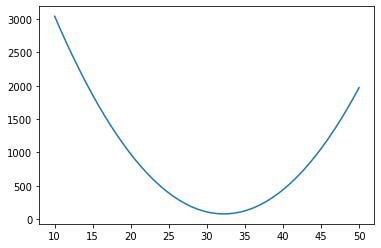

In [25]:
a0=np.linspace(10,50)
plt.plot(a0,Ea0(a0,-10))

In [26]:
optimize.fmin_powell(E,[0,0],full_output=True)

Optimization terminated successfully.
         Current function value: 58.991928
         Iterations: 5
         Function evaluations: 169


(array([ 34.69190471, -10.88597167]),
 58.99192761904762,
 array([[ 9.58580558, -2.62474386],
        [ 0.03589244,  0.0271459 ]]),
 5,
 169,
 0)

## How does this work:
From [Leat sqaure method in python](https://stackoverflow.com/a/43623588/2268280):

> [curve_fit]() is one of many optimization functions offered by scipy. Given an initial value, the resulting estimated parameters are iteratively refined so that the resulting curve minimizes the residual error, or difference between the fitted line and sampling data. A better guess reduces the number of iterations and speeds up the result. With these estimated parameters for the fitted curve, one can now calculate the specific coefficients for a particular equation (a final exercise left to the OP).

## Non-linear least square

In general, it can be used any polynomial order to adjust a data set, since it is satisfied that $n<m-1$,
with n the order of the polynomial and m the number of points known. Then, we have
$$
P_n(x) = a_nx^n + a_{n-1}x^{n-1}+...+a_1x+a_0
$$

Using a similar procedure followed in linear least square approximation, it is chose the constants $a_0,...a_n$ to minimize
the least square error 

$$
E = \sum_{i=1}^{m} ( y_i - P_n(x_i) )^2
= \sum_{i=1}^{m} ( y_i - \sum_{j=0}^{n}a_jx_i^j )^2
$$

Expanding the square difference and taking into account that E to be minimized requires that $\partial E/ 
\partial a_j = 0 $ for each $j=0,1,...n$. Following these arguments, it is found that the n+1 equations needed
to solve to find the coefficients $a_j$ are

$$
\sum_{k=0}^{n} a_k \sum_{i=1}^{m}x_i^{j+k} = \sum_{i=1}^{m}y_ix_i^j
$$

for each $j=0,1,...n$. A better way to show the equations, where m is the data length and n is the polynomial
order, is 

$$
a_0\sum_{i=1}^{m}x_i^0 + a_1\sum_{i=1}^{m}x_i^1 + a_2\sum_{i=1}^{m}x_i^2 + ... +  a_n\sum_{i=1}^{m}x_i^n =  \sum_{i=1}^{m}y_i x_i^0 \\
a_0\sum_{i=1}^{m}x_i^1 + a_1\sum_{i=1}^{m}x_i^2 + a_2\sum_{i=1}^{m}x_i^3 + ... +  a_n\sum_{i=1}^{m}x_i^{n+1} =  \sum_{i=1}^{m}y_i x_i^1\\ 
\dotsc \\
a_0\sum_{i=1}^{m}x_i^n + a_1\sum_{i=1}^{m}x_i^{n+1} + a_2\sum_{i=1}^{m}x_i^{n+2} + ... +  a_n\sum_{i=1}^{m}x_i^{2n} =  \sum_{i=1}^{m}y_i x_i^n
$$

Again, the error associated to the approximation can be obtained by initial definition of E. The error can also be defined 
using a weight function $W_i$ as

$$
E = \sum_{i=1}^{m} W_i( y_i - P_n(x_i) )^2
$$

this function $W_i$ can be defined in several ways. If $W_i = \sigma_i$, i.e., the standard deviation per particle, it is necessary to know the probability distribution followed by the experiments. In these cases where it is not known,
it is usually taken as one. 

## <font color='red'>     **Activity** </font>

<font color='red'> 
Adjust the position column data in the table 1 to a second order polynomial. What is the acceleration suffered
by the body?
</font>


In [27]:
def func(t,a2,a1,a0):
    return a2*t**2+a1*t+a0
a,kk=optimize.curve_fit(func,df.t,df.v)
t_lin=np.linspace(0,5.55)
v2_model=func(t_lin,*a)
df['v2_fitted']=func(df.t,*a)

In [28]:
df

,t,v,v_fitted,v2_fitted
0,0.00,33.10,34.691905,33.096072
1,1.11,21.33,22.608476,22.927643
2,2.22,16.57,10.525048,11.801714
3,3.33,-5.04,-1.558381,-0.281715
4,4.44,-11.74,-13.641810,-13.322643
5,5.55,-27.32,-25.725238,-27.321071


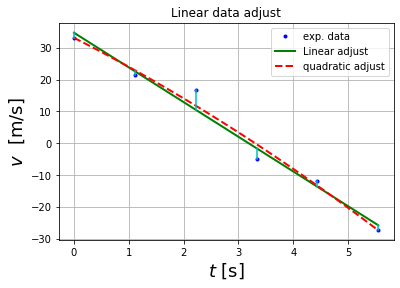

In [29]:
plt.plot(df.t,df.v,'b.',label='exp. data')
plt.plot(t_lin,v_model,'g-',lw=2,label="Linear adjust")
plt.plot(t_lin,v2_model,'r--',lw=2,label="quadratic adjust")
for i in range(df.t.size):
    plt.plot(np.array([df.t[i],df.t[i]]), np.array([df.v[i],df.v_fitted[i] ]),"c-")
    
plt.xlabel( "$t$ [s]", fontsize = 18 )
plt.ylabel( "$v$  [m/s]", fontsize = 18 )
plt.title("Linear data adjust")
plt.legend()
plt.grid(1)    

## <font color='red'>     **Activity** </font>


<font color='red'> 
The air drag for a sphere that is moving at high speeds can be expresed in the following form 
$$
f_{drag} = -\frac{1}{2} C \rho A v^2
$$

where C is the drag coefficient(0.5 for a sphere), $\rho$ is the air density (1.29kg/$m^3$) 
and A is the cross-sectional area. 
Generate points that have a bias of the value obtanied with
$f_{drag}$ using np.random.random. 


Afterwards, use a second order polynomial to fit the data 
generated and find the error associated to the approximation. 
</font>

In [44]:
import scipy.optimize as optimize

## Fit to a non-linear function
$$
f(x)=A \operatorname{e}^{cx} + d\,.
$$
Determinar: $A,c,d$

In [57]:
import pandas as pd
T_values = np.array([222, 284, 308.5, 333, 358, 411, 477, 518, 880, 1080, 1259])
C_values = np.array([0.1282, 0.2308, 0.2650, 0.3120 , 0.3547, 0.4530, 0.5556, 0.6154, 0.8932, 0.9103, 0.9316])

x_samp = T_values
y_samp = C_values

In [58]:
def func(x, A, c, d):
    return A*np.exp(c*x) + d

In [59]:
# REGRESSION ------------------------------------------------------------------
p0 = [-1, -3e-3, 1]                                        # guessed params
w, _ = optimize.curve_fit(func, x_samp, y_samp, p0=p0)     
print("E]stimated Parameters", w)  

# Model
x_lin=np.linspace(200,1350)
y_model = func(x_lin, *w)

E]stimated Parameters [-1.66301087 -0.0026884   1.00995394]


Text(0, 0.5, 'f(x)')

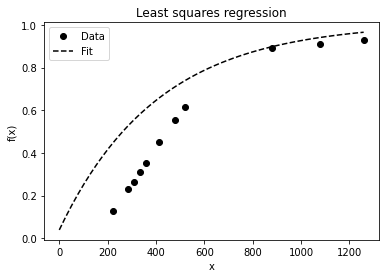

In [60]:
x_lin = np.linspace(0, x_samp.max(), 50)                   # 50 evenly spaced digits between 0 and max
# PLOT ------------------------------------------------------------------------
# Visualize data and fitted curves
plt.plot(x_samp, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")
plt.xlabel('x')
plt.ylabel('f(x)')

In [61]:
import time
for i in range(100):
    time.sleep(0.1)
    if i%10==0:
        print(i,end='\r')

### Example: exponential fit

#### Guess the number of pages of a book
https://docs.google.com/forms/d/e/1FAIpQLSeZJ0QII5JcST-M9_JgGYNzX3GahULVVFc31DQnWjJ4SdUQwg/viewform?fbclid=IwAR0wEadM0ZH-HXmp3lkAM3emCDPxs_6F509BS3EkOvldp-NFzbCOkZVSjR4

$$
f(x)=a\exp\left[ -\frac{(x-\mu)^2}{2\sigma^2} \right]
$$
where $a$ is the height of the gaussian, $\mu$ is the mean (expected value), and $\sigma$ es la varianze

In [62]:
import pandas as pd

In [63]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTu_XE2dAiTcjHTfbaVKt7xEl_GnNeF_VYFsIBi5uM-gqBlBRfNHso-X1z3lxV7IW2f9UYKmZkSOYv-/pub?output=csv')

In [64]:
df['Guess']=df.Guess.str.replace(',','').astype(int)

In [65]:
bins=range(0,1500,100)

See solution: [gaussian_fit.ipynb](./gaussian_fit.ipynb)

See fit exponential: https://github.com/restrepo/COVID-19

# Random Numbers 

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In nature it is not uncommon finding phenomena that are random intrinsic, this is why it becomes a necessity to produce random numbers in order to model such events. But, let us think about the operations that a computer can do, they are done following certain stablished rules, how then can be generated random numbers?  

This is achieved until certain point, it is only possible produce pseudo numbers, i.e, numbers obtained following some basic rules. At sequence of numbers apparently random but that are going to repeat after some period. 

Now, the most basic way to understand the generation of a pseudo-random number consists in following the next recurrence rule that produces integer random numbers

$$
r_{i+1} = (ar_i+b)\%N 
$$

$r_i$ is the seed, $a$ and $b$ and $N$ are coefficients chose. Notice that $\%$ represents the module, then the numbers obtained are going to be smaller than N. 

Now, consider the case when $ a= 3 $, $b = 2$ and $N = 10$ and the initial seed $r_0 = 3$. The new seed is the number obtaine
in the last step. 

In [88]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [92]:
import numpy as np
# Randon number function 
def random_number(seed,a=4,b=1,N=9):
    return (a*seed + b)%N

#Constant values 
a = 4
b = 1
N = 9
#Amount of random numbers  
N_iter = 15
rnumber = np.zeros(N_iter+1)
#Initial seed
rnumber[0] = 4
#rnumber[0] = 10

for i in range(N_iter): 
    print(i)
    rnumber[i+1] = random_number(seed=rnumber[i],a=3,b=2,N=10)

print ("Random numbers produced using a = %d, b = %d and N = %d\n" % ( a,b,N ))  
print (rnumber[1:])   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Random numbers produced using a = 4, b = 1 and N = 9

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [99]:
x=[]
x.append( random_number(seed=2,a=3,b=2,N=10) )

In [100]:
x

[8]

In [101]:
x.append( random_number(seed=x[0],a=3,b=2,N=10) )

In [102]:
x

[8, 6]

In [103]:
x.append( random_number(seed=x[1],a=3,b=2,N=10) )
x

[8, 6, 0]

In [104]:
x.append( random_number(seed=x[2],a=3,b=2,N=10) )
x

[8, 6, 0, 2]

In [105]:
import random
import numpy as np
import time

In [106]:
print( time.time() )
time.sleep(2)
print( time.time() )

1634059472.9308167
1634059474.9317667


In [108]:
random.random() #seed is unix time

0.1817806243693597

In [111]:
x=random.seed(4890098)
(random.random(),
random.random(),
random.random())

(0.6771981606438447, 0.7282646242796362, 0.12733022922307846)

In [117]:
np.random.random(5)

array([0.92736515, 0.70748058, 0.24424376, 0.39499408, 0.92357371])

In [119]:
np.random.seed(2)
np.random.random(5)

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ])

Notice that after N random numbers produced the apparently random sequence starts repeating again, i.e., N is the period of the sequence. Then, it is necessary to take N as big as possible but without incuring in an overflow.  What happens when the initial seed is changed?  

<img src="https://github.com/restrepo/ComputationalMethods/blob/master/material/figures/random1.png?raw=1">

To generate random numbers can be used numpy library, specifically the set functions random. There is also another library
used random, but it contains few functions comparing with numpy. 
To generate a random number between 0 and 1 initiallizing the seed with the actual time.



In [122]:
np.random.seed()
np.random.random()

0.5236690241003557

To generate a number between  and a number A

In [124]:
A = 100.
A*np.random.random((5,5))

array([[64.97346796, 21.81441262, 27.4992126 , 42.51455532, 33.8978096 ],
       [96.07940789, 92.37474077, 72.71994632,  6.42839116, 21.7457293 ],
       [49.90737194, 19.35634203, 80.13292249, 13.42429681, 63.96311543],
       [38.34239699, 35.44901774, 32.08493826, 67.04170933, 38.1683513 ],
       [59.65849373, 96.12744923,  7.80692122, 87.037614  , 48.09882618]])

To generate a random number between a range -B to B 

In [127]:
B = 15
B - 2*B*np.random.random()

-4.321592120896877

The implementation in numpy is with:

In [129]:
np.random.uniform(-15,15,(2,2))

array([[-0.41048965,  0.2230999 ],
       [14.84944624,  9.70416883]])

## Example 2

### Random walk

Start at the origin and take a 2D random walk. It is chosen values for $\Delta x'$ and $\Delta y'$ in the range [-1,1].
They are normalized so each step is of unit length. 

In [133]:
np.random.uniform(1,-1)

0.40045655018921056

In [134]:
#Initial positions
x0 = 0.
y0 = 0.
pos = [x0,y0]
#Number of random steps
N_steps = 1000
#Number of random walks
N_walks = 3


def Random_walk(N, x0=0,y0=0):
    pos=[x0,y0]
    
    x = [x0]   
    y = [y0]   

    #Generating random positions
    for i in range(1,N):
        x.append( np.random.uniform(1,-1) + x[i-1] )
        y.append( np.random.uniform(1,-1) + y[i-1] )
    
    return x, y
    

In [148]:
x,y=Random_walk(500)

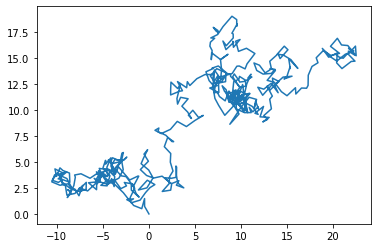

In [149]:
plt.plot(x,y)

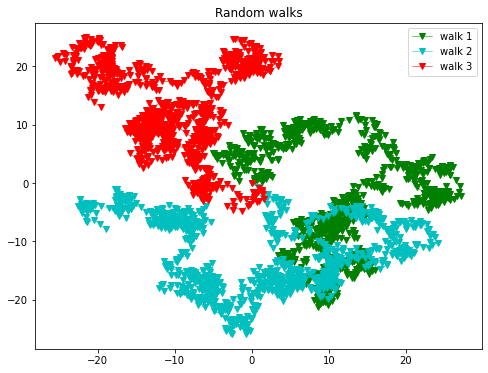

In [151]:
colors = ('b', 'g', 'c', 'r', 'm', 'y', 'k')
axisNum = 0
plt.figure( figsize = (8,6) )

N_walks=3
#Plotting random walks
for j,c in zip( range(N_walks),colors):
    
    axisNum += 1
    x,y= Random_walk( N_steps )
    #If N_walks > repeat the colors
    color = colors[axisNum % len(colors)]  
    plt.plot(x,y,"v-", color = color, lw= 0.5, label = "walk %d"%(j+1))
    

plt.title("Random walks")
plt.legend()

## <font color='red'>     </font>
**Activity** 


<font color='red'> 
Radioactive decay: Spontaneous decay is a natural process in which a particle, with no external stimulation, decays into other
particles. Then, the total amount of particles in a sample decreases with time, so will the number of decays. 
The probability decay is constant per particle and is given by  

$$
P = -\lambda  
$$

Determin when radioactive decay looks like exponential decay and when it looks stochastic depending on the initial number of particles $N(t)$ .For this, suposse that the decay rate is 0.3$\times 10^6 s^{-1}$ . Make a logarithmic plot to show the results. 
</font>

In [152]:
np.random.uniform(-15,15,(2,2))

array([[  9.7681966 ,  11.73731828],
       [-12.20883978,  -3.4881603 ]])

Espacio de parámetros aleatorios



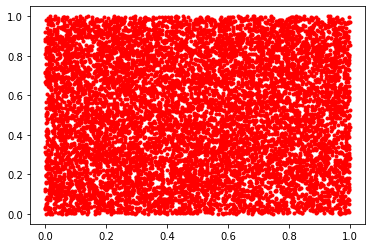

In [153]:
N=10000
plt.plot(np.random.random(N),np.random.random(N),'r.')

Hasta dos ordenes de magnitud

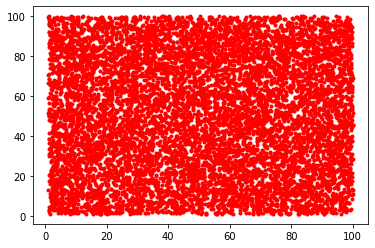

In [154]:
N=10000
plt.plot(np.random.uniform(1,100,N),np.random.uniform(1,100,N),'r.')

Varios ordenes de magnitud: $10^{-4}$ a $10^2$

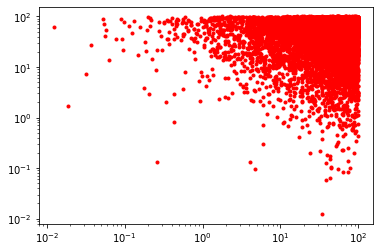

In [155]:
N=10000
plt.loglog(np.random.uniform(1E-4,1E2,N),np.random.uniform(1E-4,1E2,N),'r.')

$x=10^{\log_{10}(x)}$

In [156]:
10**np.log10(24.456)

24.455999999999996

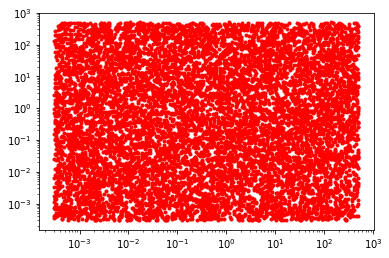

In [157]:
N=10000
xmin=3E-4;xmax=5E2
ymin=xmin;ymax=xmax
plt.loglog(  10**np.random.uniform(np.log10(xmin),np.log10(xmax),N),
             10**np.random.uniform(np.log10(ymin),np.log10(ymax),N),'r.')

In [158]:
np.random.randint(1,100)

27

## Appendix

In [40]:
# Finding adjusting parameters 
def Linear_least_square( x,y ):
    
    #Finding coefficients 
    length = len(x)
    square_x = np.sum([x[i]**2 for i in xrange(length)])
    sum_xy = np.sum([x[i]*y[i] for i in xrange(length)])
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    a0 = ( square_x*sum_y - sum_xy*sum_x ) / ( length*square_x  - sum_x**2 )
    a1 = ( length*sum_xy - sum_x*sum_y ) / ( length*square_x  - sum_x**2 )
    
    #Returning a_0 and a_1 coefficients
    return np.array([a0,a1])

#Line function adjusting the data set
def Line(a0,a1,x):
    return a0+a1*x


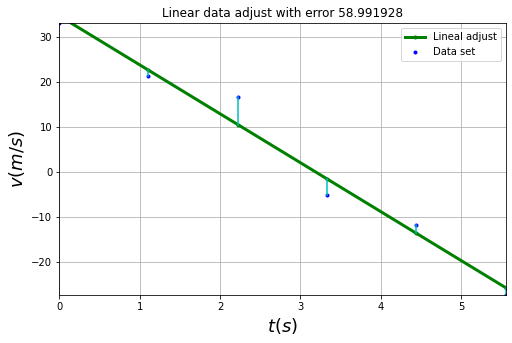

In [42]:
xrange=range
#========================================================
# Adjusting to a first order polynomy the data set v 
#========================================================
#Setting figure
plt.figure( figsize = (8,5) )

#Time
t = np.array([ 0.,  1.11,  2.22,  3.33,  4.44, 5.55])

#Velocities measured for every time t[i]
v = np.array([33.10, 21.33, 16.57, -5.04, -11.74, -27.32])

#Making data adjust
a0, a1 = Linear_least_square( t,v )

#Finding error associated to linear approximation
E = np.sum([ ( v[i] - Line(a0,a1,t[i]) )**2  for i in xrange(len(t))])

#Plotting solution
plt.plot( t, Line(a0,a1,t), ".-", lw = 3.,color = "green",label="Lineal adjust" )
plt.plot( t, v, ".",color = "blue", label = "Data set" )
for i in xrange(len(t)):
    plt.plot(np.array([t[i],t[i]]), np.array([v[i],Line(a0,a1,t[i])]),"c-")
    
#Format of figure
plt.xlabel( "$t(s)$", fontsize = 18 )
plt.ylabel( "$v(m/s)$", fontsize = 18 )
plt.xlim( (t[0], t[-1]) )
plt.ylim( (v[-1], v[0]) )
plt.title("Linear data adjust with error %f"%E)
plt.legend()
plt.grid(1)

## <font color='red'>     **Activity** </font>
http://scipy-cookbook.readthedocs.io/items/robust_regression.html

<font color='red'>    
Using the next data set of a spring mass system, find the lineal adjust. 
</font>

<img src="https://github.com/restrepo/ComputationalMethods/blob/master/material/figures/datos.png?raw=1">